IMPORT LIBRARIES

In [1]:
!pip install -q --upgrade ipython
!pip install -q --upgrade ipykernel

     |████████████████████████████████| 786 kB 13.8 MB/s 
     |████████████████████████████████| 368 kB 30.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.19 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.26.0 which is incompatible.
     |████████████████████████████████| 122 kB 12.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.19 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.0.3 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, bu

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Load Dataset



In [3]:
Text= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IR 7071cem/news_articles.csv')

Exploratory Data Analysis

In [4]:
Text.head()

,url,category,body
0,https://www.bbc.co.uk/news/business-52892398,business,easyjet and cruise firm carnival are to lose t...
1,https://www.bbc.co.uk/news/business-52897418,business,british airways is in a bitter standoff with u...
2,https://www.bbc.co.uk/news/business-52896266,business,us trade representative robert lighthizer the...
3,https://www.bbc.co.uk/news/uk-england-beds-buc...,business,google adelie foods was hit by a drop in the ...
4,https://www.bbc.co.uk/news/business-52883453,business,"matthew horwood some 300,000 more uk workers ..."


In [5]:
Text.shape

(1676, 3)

In [6]:
Text['category'].value_counts()

business                  338
science_and_enviroment    302
technology                252
health                    242
travel                    169
entertainment_and_arts    118
sport                      96
food_and_drink             86
politics                   62
family_and_education       11
Name: category, dtype: int64

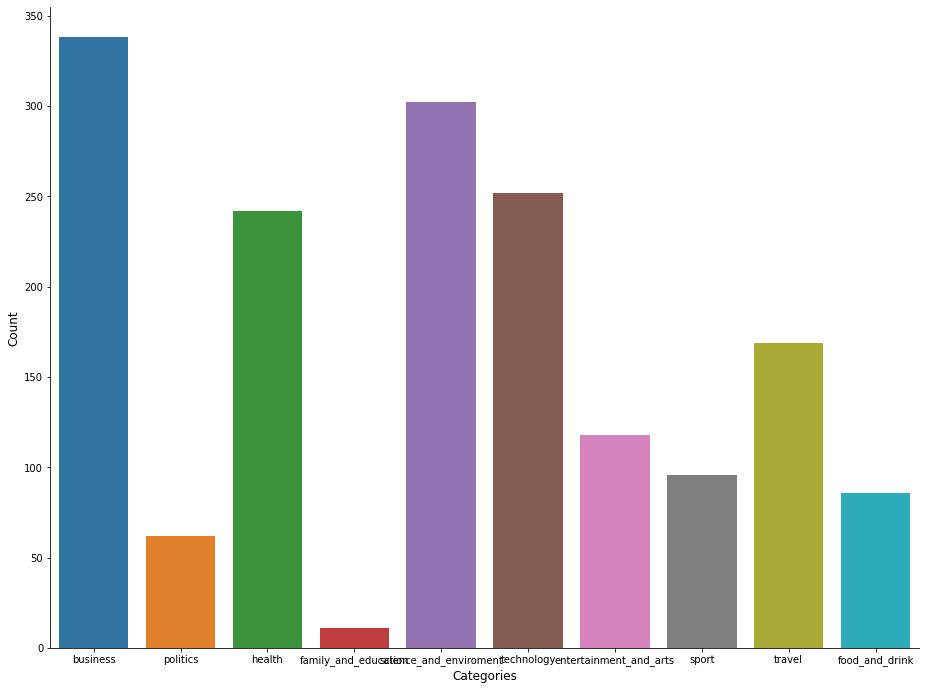

In [7]:
Plot= sns.catplot(x='category', kind= 'count', data= Text)
Plot.fig.set_size_inches(15, 10)
Plot.set_xlabels('Categories', fontsize=12)
Plot.set_ylabels('Count', fontsize=12)

DATA PREPROCESSING


In [8]:
#Drop irrelevant column, which is the url column. It has no use for the text classification model.

Data= Text.drop(columns="url")

In [9]:
Data.head(3)

,category,body
0,business,easyjet and cruise firm carnival are to lose t...
1,business,british airways is in a bitter standoff with u...
2,business,us trade representative robert lighthizer the...


In [10]:
Data.isna().any()

category    False
body        False
dtype: bool

In [14]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
stemmer = WordNetLemmatizer()

corpus = []
for i in range(0, len(Data)):
    # Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', Data['body'][i])
    # Convert to lowercase
    text = text.lower()
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    # Convert to list from string
    text = text.split()
    # Stemming
    ps=PorterStemmer()
    # Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  stopwords] 
    text = " ".join(text)
    corpus.append(text)

In [15]:
print("Words before cleaning===============> {}".format(Data.body[1]))

Words before cleaning===============> british airways is in a bitter standoff with unions over sweeping proposals to restructure its business.  as well as proposing to make up to 12,000 staff redundant, ba also wants change pay and conditions for its workforce.  this restructuring could include pay cuts and worse conditions for some staff, while others could benefit.  pilots union balpa is engaging with the airline, but some other unions are refusing to come to the table.  crew concerns  anxious, scared, used and betrayed. that is how one member of british airways' cabin crew has described her feelings, as she waits to find out whether or not she will lose her job.  the company has already warned that thousands of jobs could go at the airline, as it struggles to deal with the impact of the covid-19 pandemic.  but according to the trade union unite, which represents cabin crew and check-in staff, the reality is much worse than that.  it claims the company wants to fire virtually its ent

In [16]:
print("Words after cleaning===============> {}".format(corpus[1]))


Words after cleaning===============> british airway bitter standoff union sweeping proposal restructure business well proposing make staff redundant ba also want change pay condition workforce restructuring could include pay cut worse condition staff others could benefit pilot union balpa engaging airline union refusing come table crew concern anxious scared used betrayed one member british airway cabin crew described feeling wait find whether lose job company already warned thousand job could go airline struggle deal impact covid pandemic according trade union unite represents cabin crew check staff reality much worse claim company want fire virtually entire workforce employing inferior term condition charge company vehemently denies burning cash aviation industry whole ravaged effect pandemic left aircraft grounded worldwide leaving airline hardly revenue widely expected recovery slow one traffic unlikely return level seen last year earliest carrier left trying cope acute crisis prep

In [17]:
X= corpus
y= Data["category"]

In [18]:
# TFIDF function for transforming text into a represntable format to build a machine learning prediction  

tfidfconverter = TfidfVectorizer(max_features=2500, min_df=5, max_df=0.7)
X = tfidfconverter.fit_transform(X).toarray()

In [19]:
#Data smoting to reduce imbalaces in data

X_resampled, y_resampled = SMOTE(random_state=42).fit_sample(X, y)


In [35]:
#Splitting data into train and test set

Xtrain,Xtest,ytrain,ytest=train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

MODELLING


In [48]:
from sklearn.naive_bayes import GaussianNB
NV_model = GaussianNB()
NV_model.fit(Xtrain, ytrain)

prediction = NV_model.predict(Xtest)

In [49]:

def print_evaluation_scores(y_val, predicted):
    print('Accuracy score: ', accuracy_score(y_val, predicted))
    print('F1 score: ', f1_score(y_val, predicted, average='micro'))
    print('Average precision score: ', precision_score(y_val, predicted, average='micro'))
    print('Average recall score: ', recall_score(y_val, predicted, average='micro'))

In [38]:
print_evaluation_scores(ytest, prediction)

Accuracy score:  0.8727810650887574
F1 score:  0.8727810650887574
Average precision score:  0.8727810650887574
Average recall score:  0.8727810650887574


Logistic Regression Model

In [39]:
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression()
LR.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
Y_pred=LR.predict(Xtest)

print("The accuracy of Test set is {}".format(LR.score(Xtest,ytest)))

The accuracy of Test set is 0.908284023668639


In [26]:
print_evaluation_scores(ytest, Y_pred)

Accuracy score:  0.908284023668639
F1 score:  0.908284023668639
Average precision score:  0.908284023668639
Average recall score:  0.908284023668639


In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(ytest,Y_pred))
print(classification_report(ytest,Y_pred))
print(accuracy_score(ytest, Y_pred))

[[74  2  0  3  0  2  0  0  2  5]
 [ 0 57  0  0  0  0  0  0  0  0]
 [ 0  0 57  0  0  0  0  0  0  0]
 [ 0  0  0 73  0  0  0  0  1  0]
 [ 0  0  2  2 64  6  2  0  0  1]
 [ 0  0  1  0  0 52  0  0  0  0]
 [ 2  1  0  1  2  0 44  0 14  0]
 [ 0  1  0  0  0  0  0 72  0  0]
 [ 0  0  0  0  0  0  6  1 50  0]
 [ 2  1  0  0  0  1  1  0  0 71]]
                        precision    recall  f1-score   support

              business       0.95      0.84      0.89        88
entertainment_and_arts       0.92      1.00      0.96        57
  family_and_education       0.95      1.00      0.97        57
        food_and_drink       0.92      0.99      0.95        74
                health       0.97      0.83      0.90        77
              politics       0.85      0.98      0.91        53
science_and_enviroment       0.83      0.69      0.75        64
                 sport       0.99      0.99      0.99        73
            technology       0.75      0.88      0.81        57
                travel      

In [50]:
#Defining the text classifier to be used on the dataset that has just been trained for quick retrieval of information.

from joblib import dump, load
dump(tfidfconverter, "preprocessor.joblib")
dump(LR, "classifier.joblib")

['classifier.joblib']

In [51]:
#Loading the trained dataset and save them in the variable model

Preprocessor = load("preprocessor.joblib")
Text_classifier = load("classifier.joblib")

#Coonstructing the format of the result output.
def Predict():
  word = input("Enter search word: ")
  word = Preprocessor.transform([word])
  prediction = Text_classifier.predict(word)[0]
  print("Subject class: {}." .format(prediction))

In [59]:
Predict()

Enter search word: sandwich and chicken
Subject class: food_and_drink.
